In [8]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [39]:
x=np.array([1.4, 1.6, 2, 2.5, 3.1])
y=np.array([2.39, 3.85, 2.74, 1.58, 3.15])
n=len(x)-1
h=np.diff(x)
a=y
b=np.zeros(n)
c=np.zeros(n)
d=np.zeros(n)
alpha=np.zeros(n)

for i in range(1, n):
    alpha[i]=(3/h[i])*(a[i+1]-a[i])-(3/h[i-1])*(a[i]-a[i-1])
    
l=np.ones(n)
mu=np.zeros(n)
z=np.zeros(n)

for i in range(1, n):
    l[i]=2*(x[i+1]-x[i-1])-h[i-1]*mu[i-1]
    mu[i]=h[i]/l[i]
    z[i]=(alpha[i]-h[i-1]*z[i-1])/l[i]
    
c[n-1]=(alpha[n-1]-h[n-2]*z[n-2])/(2*(h[n-2]+mu[n-1]))
b[n-1]=(a[n]-a[n-1])/h[n-1]-h[n-1]*(2*c[n-1]+c[n-2])/3
d[n-1]=(c[n-1]-c[n-2])/(3*h[n-1])
    
for j in range(n -2, -1, -1):
    c[j]=z[j]-mu[j]*c[j+1]
    b[j]=(a[j+1]-a[j])/h[j]-h[j]*(c[j+1]+2*c[j])/3
    d[j]=(c[j+1]-c[j])/(3*h[j])

for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x)={a[i]}+{b[i].round(4)}(x-{x[i]})+{c[i].round(4)}(x-{x[i]})^2+{d[i].round(4)}(x-{x[i]})^3, x належить проміжку [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x)=2.39+9.0839(x-1.4)+0.0(x-1.4)^2+-44.5964(x-1.4)^3, x належить проміжку [1.4, 1.6]
Відрізок 2:
S_1(x)=3.85+3.7323(x-1.6)+-26.7578(x-1.6)^2+26.224(x-1.6)^3, x належить проміжку [1.6, 2.0]
Відрізок 3:
S_2(x)=2.74+-5.0865(x-2.0)+4.7109(x-2.0)^2+1.644(x-2.0)^3, x належить проміжку [2.0, 2.5]
Відрізок 4:
S_3(x)=1.58+-0.2541(x-2.5)+7.1769(x-2.5)^2+3.9872(x-2.5)^3, x належить проміжку [2.5, 3.1]


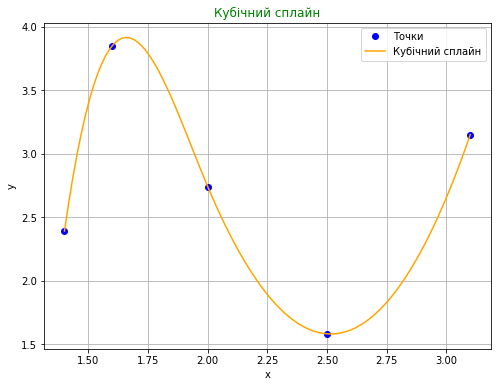

In [38]:
cs = CubicSpline(x, y)
x_new = numpy.linspace(numpy.min(x), numpy.max(x), 100)
y_new = cs(x_new)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', c="b", label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн', color='green')
plt.legend()
plt.grid(True)
plt.show()